# random walk

## The position of the walker in 2D
The position of the walker (X, Y)
$$ X = X_1 + X_2 + \cdots + X_n$$
$$ Y = Y_1 + Y_2 + \cdots + Y_n$$

The position of the walker is represented as $(X, Y)$, where $X$ and $Y$ are obtained as cumulative sums of random variables $X_1, X_2, \ldots, X_n$ and $Y_1, Y_2, \ldots, Y_n$, respectively. These random variables are independent and identically distributed (i.i.d.), following a uniform distribution.

Text(0.5, 1.0, '$X_i$ and $Y_i$ are uniform[-1,1] ')

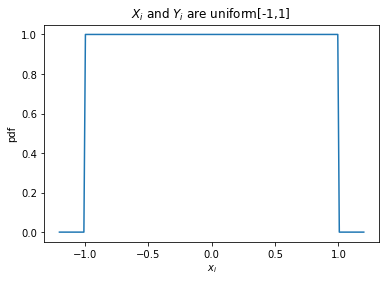

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.linspace(-1.2, 1.2, 200)
pdf = (x >= -1) * (x <= 1)
ax.plot(x, pdf)
ax.set_xlabel('$x_i$')
ax.set_ylabel('pdf')
ax.set_title('$X_i$ and $Y_i$ are uniform[-1,1] ')



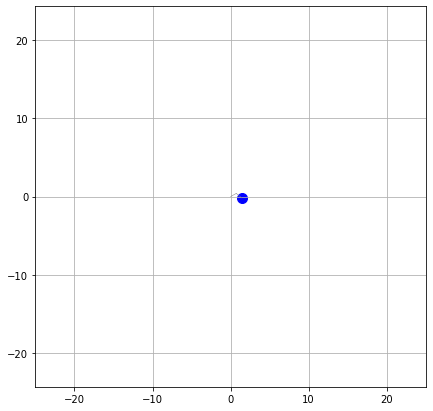

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

class RandomWalkAnimation:
    def __init__(self, num_steps=300, xlim=(-25, 25), ylim=(-25, 25)):
        # Create the figure and axis objects
        self.fig, self.ax = plt.subplots(figsize=(7, 7))

        # Initial positions of the points on the circle
        self.pos_x, self.pos_y = 0, 0

        # Number of steps in the animation
        self.num_steps = num_steps

        # Create the scatter plot for the moving points
        self.walker = self.ax.scatter(0, 0, c="b", s=100)

        # Set axis properties
        self.ax.axis('equal')
        self.ax.set_xlim(xlim)
        self.ax.set_ylim(ylim)
        self.ax.grid(True)

    # Update function for the animation
    def update(self, frame):
        # Update the positions of the points
        old_x, old_y = self.pos_x, self.pos_y
        self.pos_x += np.random.uniform(-1, 1)  # Randomly update x position
        self.pos_y += np.random.uniform(-1, 1)  # Randomly update y position
        self.walker.set_offsets(np.c_[self.pos_x, self.pos_y])  # Set the new positions for the scatter plot

        # Plot a gray line connecting the old and new positions of the points
        self.ax.plot([old_x, self.pos_x], [old_y, self.pos_y], color='gray', linewidth=0.5)

        return (self.walker,)

    # Create and display the animation
    def display_animation(self):
        animation = FuncAnimation(fig=self.fig, func=self.update, frames=self.num_steps, interval=100, blit=True)
        plt.show()
        return HTML(animation.to_jshtml())

# Example usage:
num_steps = 300
xlim = (-25, 25)
ylim = (-25, 25)
anim = RandomWalkAnimation(num_steps=num_steps, xlim=xlim, ylim=ylim)
anim.display_animation()